In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
# pandas for handling our dataset
import pandas as pd
# numpy for numeric operations
import numpy as np
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# seaborn for beautiful visualizations
import seaborn as sns
# regualar expression
import re
# print inline in this notebook
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.





combats.csv
db_timesheet_log.csv
dice_us_jobs.csv
job_skills-1.csv
job_skills-2.csv
pokemon.csv
tests.csv



In [91]:
# read the data set using pandas .read_csv() method
df_job_skills = pd.read_csv('./input/job_skills-1.csv')
# print the top 5 row from the dataframe
df_job_skills.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [92]:
# most popular language list 
programing_language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','kotlin']



In [93]:
# get our Minimum Qualifications column and convert all of the values to a list
minimum_qualifications = df_job_skills['Minimum Qualifications'].tolist()
# let's join our list to a single string and lower case the letter
miniumum_qualifications_string = "".join(str(v) for v in minimum_qualifications).lower()



In [94]:
# find out which language occurs in most in minimum Qualifications string
wordcount = dict((x,0) for x in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'kotlin': 3}


In [95]:
# sort the dict
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(programming_language_popularity)

[('python', 97), ('javascript', 77), ('java', 76), ('sql', 73), ('c++', 54), ('c', 18), ('c#', 15), ('ruby', 14), ('php', 7), ('perl', 6), ('objective-c', 3), ('kotlin', 3)]


In [96]:
# make a new dataframe using programming_language_popularity for easy use cases
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

print(df_popular_programming_lang)

       Language  Popularity
11       Kotlin           3
10  Objective-c           3
9          Perl           6
8           Php           7
7          Ruby          14
6            C#          15
5             C          18
4           C++          54
3           Sql          73
2          Java          76
1    Javascript          77
0        Python          97


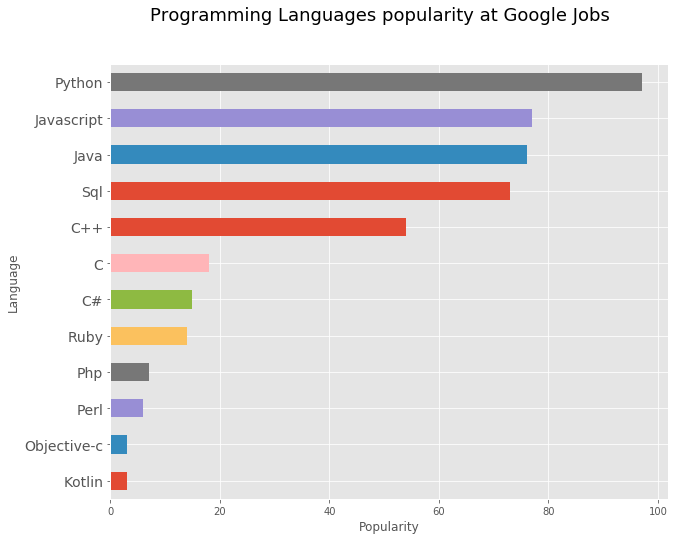

In [97]:
# plot
df_popular_programming_lang.plot.barh(x='Language',y='Popularity',figsize=(10,8), legend=False)
# add a suptitle
plt.suptitle("Programming Languages popularity at Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

In [98]:
degree_list = ["ba", "bs", "bachelor's", "phd", "master's"]

In [99]:
#print(miniumum_qualifications_string)
wordcount = dict((x,0) for x in degree_list)

for w in re.findall(r"[\w']+|[.,!?;’]", miniumum_qualifications_string, flags=re.IGNORECASE):

    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'ba': 800, 'bs': 877, "bachelor's": 147, 'phd': 8, "master's": 49}


In [100]:
degree_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(degree_popularity)

[('bs', 877), ('ba', 800), ("bachelor's", 147), ("master's", 49), ('phd', 8)]


In [101]:
df_degree_popular = pd.DataFrame(degree_popularity,columns=['Degree','Popularity'])

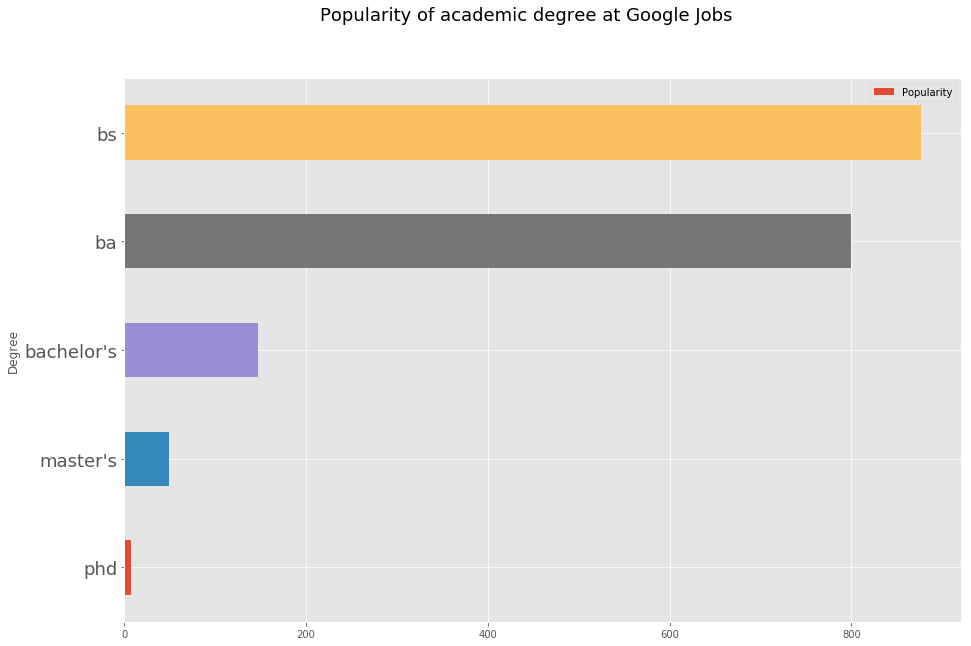

In [102]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.barh(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
# add a suptitle
plt.suptitle("Popularity of academic degree at Google Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

In [103]:
# this portion of code is taken from https://www.kaggle.com/djcarlos/are-you-experienced-enough-to-work-at-google 
years_exp = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
     years_exp[w] += 1
        
print(years_exp)

defaultdict(<function <lambda> at 0x115aa8268>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


In [104]:
years_exp = sorted(years_exp.items(), key=lambda kv: kv[1], reverse=True)


In [105]:
df_years_exp = pd.DataFrame(years_exp,columns=['Years of experience','Popularity'])
df_years_exp = df_years_exp[::-1] 

print(df_years_exp.head)

<bound method NDFrame.head of    Years of experience  Popularity
14                  14           1
13                  11           1
12                  13           1
11                  15           4
10                   9           8
9                    1          16
8                   12          18
7                    7          41
6                    6          60
5                    2          60
4                    8          65
3                   10          76
2                    4          92
1                    3         114
0                    5         181>


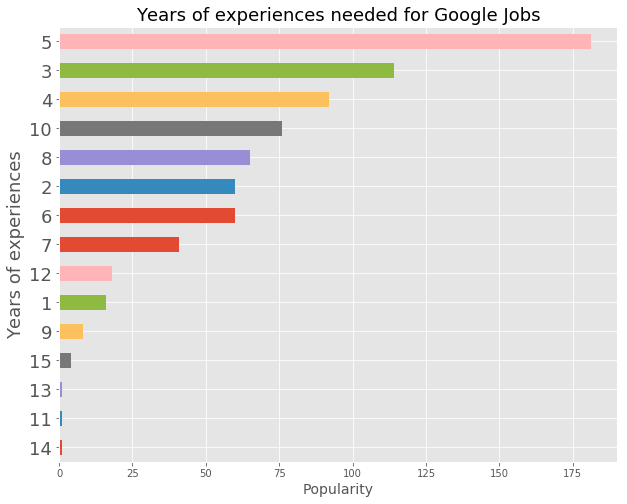

In [106]:
# plot
df_years_exp.plot.barh(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

# 5. Let's find out which job category Google wants more experiences.

In [107]:
df_job_skills['Experience'] = df_job_skills['Minimum Qualifications'].str.extract(r'([0-9]+) year', expand=False)

#print(df_job_skills)

In [108]:
dff = df_job_skills[['Experience','Category']]
dff = dff.dropna()

#print(dff)

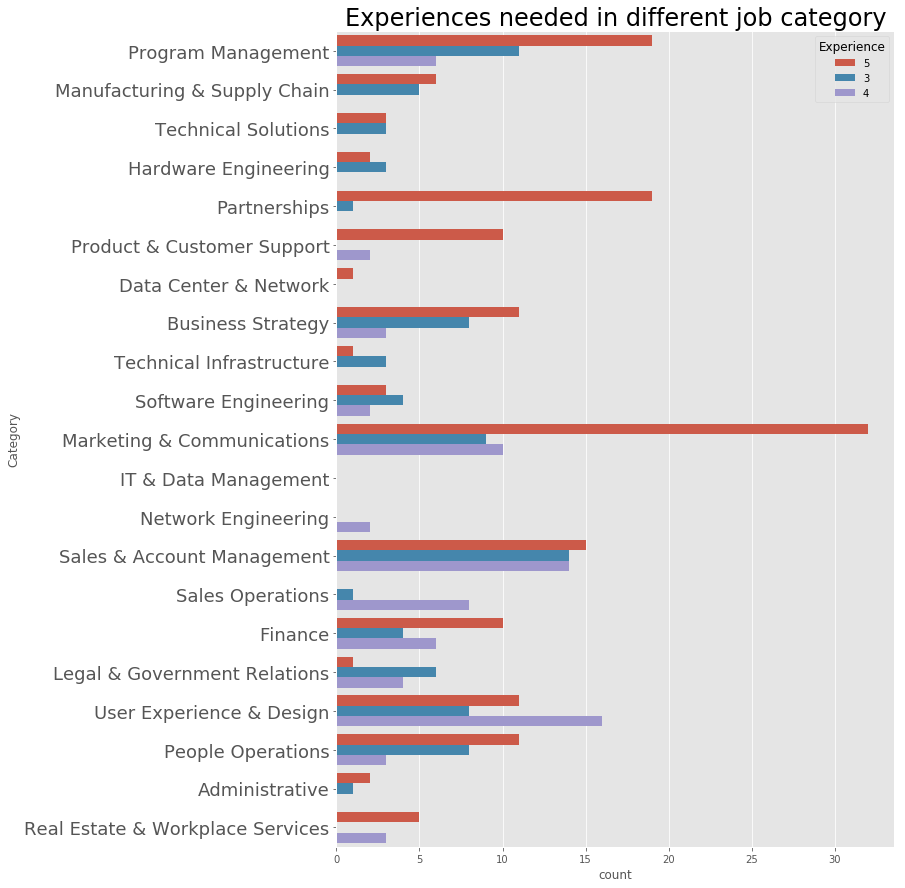

In [109]:
plt.figure(figsize=(10,15))
plt.title('Experiences needed in different job category', fontsize=24)
sns.countplot(y='Category', hue='Experience', data=dff, hue_order=dff.Experience.value_counts().iloc[:3].index)
plt.yticks(fontsize=18)
plt.show()

In [111]:
# read the data set using pandas .read_csv() method
df_job_skills = pd.read_csv('./input/job_skills-2.csv')
# print the top 5 row from the dataframe
df_job_skills.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [112]:
# most popular language list 
programing_language_list = ['python', 'java', 'c++', 'php', 'javascript', 'objective-c', 'ruby', 'perl','c','c#', 'sql','kotlin']


In [113]:
# get our Minimum Qualifications column and convert all of the values to a list
minimum_qualifications = df_job_skills['Minimum Qualifications'].tolist()
# let's join our list to a single string and lower case the letter
miniumum_qualifications_string = "".join(str(v) for v in minimum_qualifications).lower()



In [114]:
# find out which language occurs in most in minimum Qualifications string
wordcount = dict((x,0) for x in programing_language_list)
for w in re.findall(r"[\w'+#-]+|[.!?;’]", miniumum_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'python': 97, 'java': 76, 'c++': 54, 'php': 7, 'javascript': 77, 'objective-c': 3, 'ruby': 14, 'perl': 6, 'c': 18, 'c#': 15, 'sql': 73, 'kotlin': 3}


In [115]:
# sort the dict
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(programming_language_popularity)

[('python', 97), ('javascript', 77), ('java', 76), ('sql', 73), ('c++', 54), ('c', 18), ('c#', 15), ('ruby', 14), ('php', 7), ('perl', 6), ('objective-c', 3), ('kotlin', 3)]


In [116]:
# make a new dataframe using programming_language_popularity for easy use cases
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

print(df_popular_programming_lang)

       Language  Popularity
11       Kotlin           3
10  Objective-c           3
9          Perl           6
8           Php           7
7          Ruby          14
6            C#          15
5             C          18
4           C++          54
3           Sql          73
2          Java          76
1    Javascript          77
0        Python          97


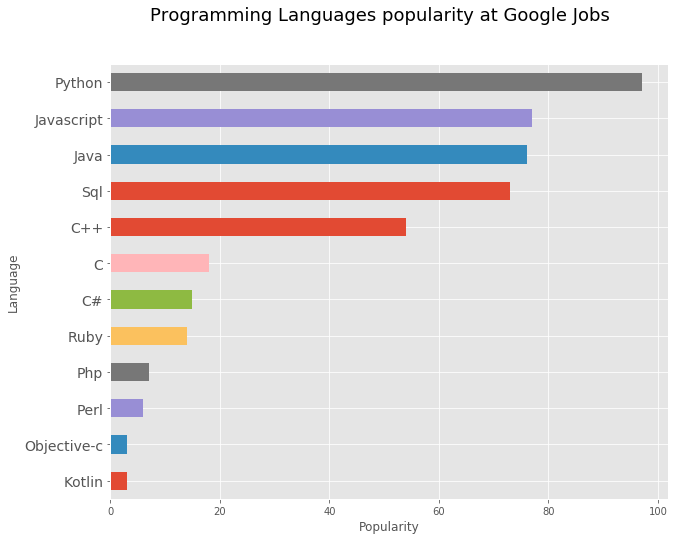

In [117]:
# plot
df_popular_programming_lang.plot.barh(x='Language',y='Popularity',figsize=(10,8), legend=False)
# add a suptitle
plt.suptitle("Programming Languages popularity at Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity")
# change xticks fontsize to 14
plt.yticks(fontsize=14)
# finally show the plot
plt.show()

In [118]:
degree_list = ["ba", "bs", "bachelor's", "phd", "master's"]

In [119]:
#print(miniumum_qualifications_string)
wordcount = dict((x,0) for x in degree_list)

for w in re.findall(r"[\w']+|[.,!?;’]", miniumum_qualifications_string, flags=re.IGNORECASE):

    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'ba': 800, 'bs': 877, "bachelor's": 147, 'phd': 8, "master's": 49}


In [120]:
degree_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

print(degree_popularity)

[('bs', 877), ('ba', 800), ("bachelor's", 147), ("master's", 49), ('phd', 8)]


In [121]:
df_degree_popular = pd.DataFrame(degree_popularity,columns=['Degree','Popularity'])

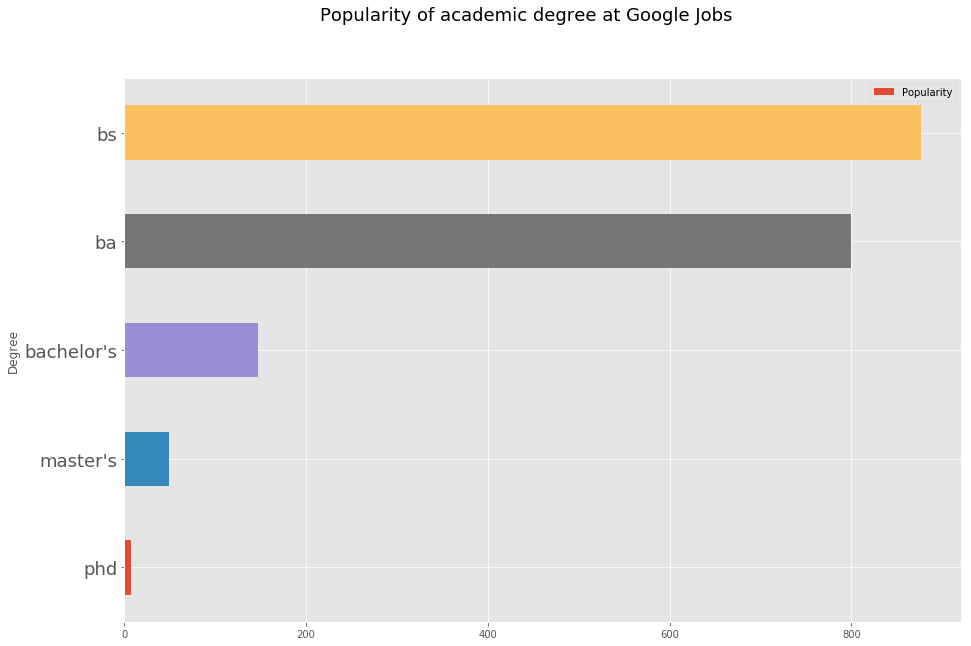

In [122]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.barh(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
# add a suptitle
plt.suptitle("Popularity of academic degree at Google Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

In [123]:
# this portion of code is taken from https://www.kaggle.com/djcarlos/are-you-experienced-enough-to-work-at-google 
years_exp = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]+) year', miniumum_qualifications_string):
     years_exp[w] += 1
        
print(years_exp)

defaultdict(<function <lambda> at 0x115b0d158>, {'3': 114, '7': 41, '2': 60, '1': 16, '4': 92, '10': 76, '5': 181, '12': 18, '8': 65, '6': 60, '9': 8, '15': 4, '13': 1, '11': 1, '14': 1})


In [124]:
years_exp = sorted(years_exp.items(), key=lambda kv: kv[1], reverse=True)

In [125]:
df_years_exp = pd.DataFrame(years_exp,columns=['Years of experience','Popularity'])
df_years_exp = df_years_exp[::-1] 

print(df_years_exp.head)

<bound method NDFrame.head of    Years of experience  Popularity
14                  14           1
13                  11           1
12                  13           1
11                  15           4
10                   9           8
9                    1          16
8                   12          18
7                    7          41
6                    6          60
5                    2          60
4                    8          65
3                   10          76
2                    4          92
1                    3         114
0                    5         181>


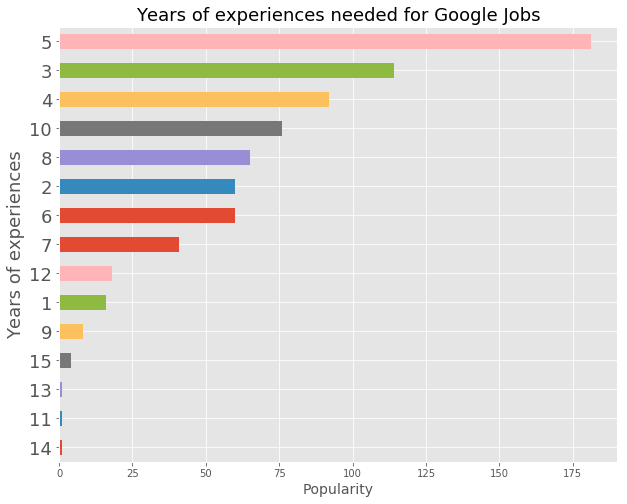

In [126]:
# plot
df_years_exp.plot.barh(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Google Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

In [127]:
df_job_skills['Experience'] = df_job_skills['Minimum Qualifications'].str.extract(r'([0-9]+) year', expand=False)

#print(df_job_skills)